In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load Dataset
xls = pd.ExcelFile(r"C:\Users\kumma\OneDrive\文档\prediction data.xlsx")
data = pd.read_excel(xls, sheet_name='vw_ChurnData')

Data Preprocessing

In [6]:
# Encode categorical features
label_encoder = LabelEncoder()

# Columns that need encoding
categorical_columns = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 
                       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
                       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 
                       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 
                       'Payment_Method', 'Customer_Status']

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

Train The Model

In [7]:
# Define features (X) and target (y)
X = data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
y = data['Customer_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate a classification report to evaluate the model
classification_report_rf = classification_report(y_test, y_pred)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       545
           1       0.86      0.93      0.89      1258

    accuracy                           0.84      1803
   macro avg       0.82      0.79      0.80      1803
weighted avg       0.84      0.84      0.84      1803



Evaluate Model

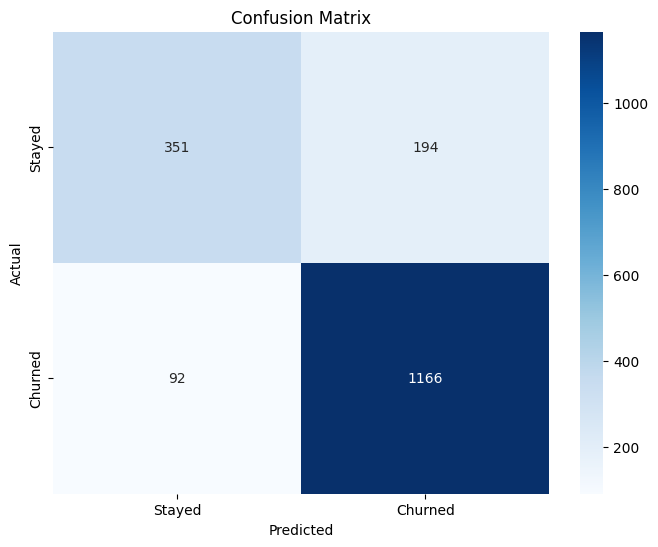

In [8]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Use Model for Prediction on New Data

In [12]:
# Load the new data (Prediction_Data.xlsx)
file_path = r"C:\Users\kumma\OneDrive\文档\prediction data.xlsx"
sheet_name = 'vw_JoinData'

# Read the new data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1, errors='ignore')

# Create new LabelEncoder for each categorical column
label_encoders = {}  # Dictionary to store label encoders for each column
for column in new_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    new_data[column] = le.fit_transform(new_data[column])
    label_encoders[column] = le  # Store the label encoder for future use if needed

# Make predictions on the new data using the previously trained Random Forest model (rf_model)
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned" (assuming 1 = Churned)
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results to a CSV file
original_data.to_csv(r"C:\Users\kumma\OneDrive\文档\data analytics res\Predictions.csv", index=False)

# Display the filtered DataFrame with churned customers
print(original_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4